

# This is Cat dog classofier using the CNN convolutional neural  network architecture
* **in this i use  3 convolutional layer with each
of 64 having kernel size of (4,4) having activation of relu in all of them**
* **after trining it have a validation accuracy of above 95 with this CNN architecture**
* **Here it predicts 1 for dog and 0 for Cat**
* **I tested it on anoter image as here shown it give accurate image for them also**



In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [5]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data

Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
 97% 963M/991M [00:12<00:00, 307MB/s]
100% 991M/991M [00:12<00:00, 84.9MB/s]


In [6]:
import zipfile
zip=zipfile.ZipFile("/content/dog-vs-cat-images-data.zip")
zip.extractall("/content/dog-vs-cat-images-data")
zip.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Dense


In [8]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dog-vs-cat-images-data/dogcat/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256),



)
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dog-vs-cat-images-data/dogcat/validation",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)

)
test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dog-vs-cat-images-data/dogcat/test1",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256),

)



Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.
Found 12500 files belonging to 1 classes.


In [9]:
def get_process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label
train_ds=train_ds.map(get_process)
validation_ds=validation_ds.map(get_process)
test_ds=test_ds.map(get_process)


In [10]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(4,4),padding="valid",activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(4,4),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(4,4),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 123, 123, 64)   │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 58, 58, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,040,577 (26.86 MB)

 Trainable params: 7,040,577 (26.86 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.learning_rate=0.001
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [13]:
histroy=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 133ms/step - accuracy: 0.5498 - loss: 0.7090 - val_accuracy: 0.6860 - val_loss: 0.5943
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.6864 - loss: 0.5940 - val_accuracy: 0.7485 - val_loss: 0.5087
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.7675 - loss: 0.4806 - val_accuracy: 0.8465 - val_loss: 0.3430
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.8495 - loss: 0.3342 - val_accuracy: 0.9021 - val_loss: 0.2329
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.9275 - loss: 0.1809 - val_accuracy: 0.9039 - val_loss: 0.3028
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.9653 - loss: 0.0960 - val_accuracy: 0.9121 - val_loss: 0.2867
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.9751 - loss: 0.0706 - val_accuracy: 0.9476 - val_loss: 0.1865
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.9806 - loss:

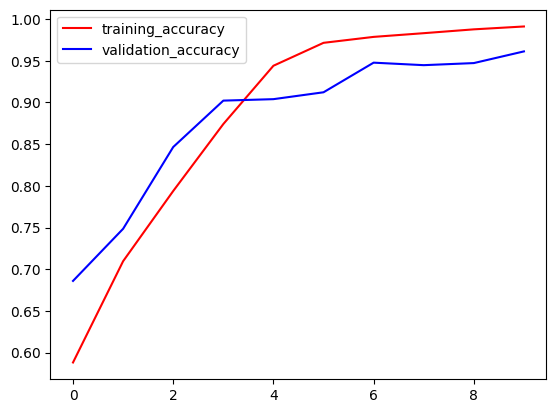

In [14]:
import matplotlib.pyplot as plt
plt.plot(histroy.history["accuracy"],color="red",label="training_accuracy")
plt.plot(histroy.history["val_accuracy"],color="blue",label="validation_accuracy")
plt.legend()
plt.show()

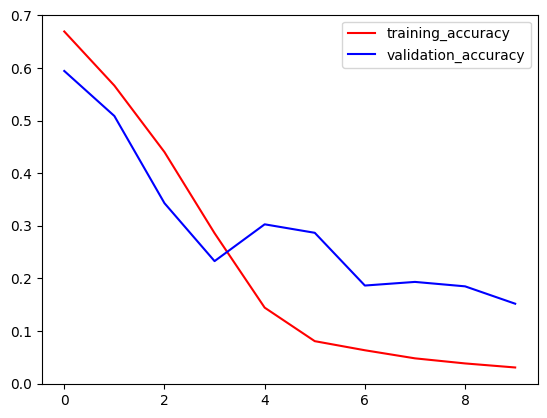

In [16]:
plt.plot(histroy.history["loss"],color="red",label="training_accuracy")
plt.plot(histroy.history["val_loss"],color="blue",label="validation_accuracy")
plt.legend()
plt.show()

In [17]:
import cv2

In [18]:
dog_image=cv2.imread("/content/dog.jpg")

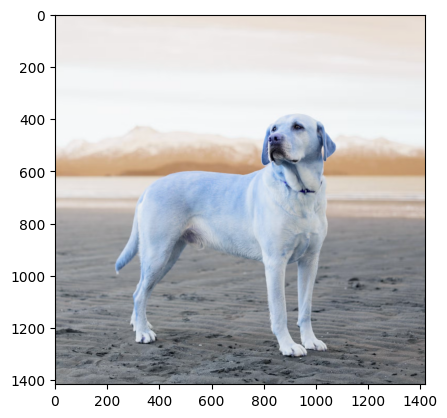

In [19]:
plt.imshow(dog_image)

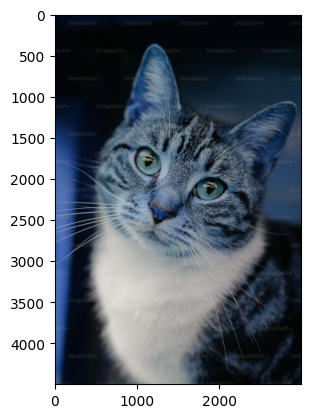

In [20]:
cat_image=cv2.imread("/content/cat.jpg")
plt.imshow(cat_image)

array([[[233, 228, 225],
        [233, 228, 225],
        [233, 228, 225],
        ...,
        [235, 219, 207],
        [234, 218, 206],
        [234, 218, 206]],

       [[235, 230, 227],
        [235, 230, 227],
        [235, 230, 227],
        ...,
        [234, 217, 208],
        [234, 218, 206],
        [234, 218, 206]],

       [[237, 232, 229],
        [237, 232, 229],
        [237, 232, 229],
        ...,
        [233, 218, 209],
        [234, 218, 206],
        [234, 218, 206]],

       ...,

       [[140, 142, 143],
        [144, 146, 147],
        [138, 140, 141],
        ...,
        [108, 110, 111],
        [103, 106, 110],
        [ 98, 101, 105]],

       [[144, 146, 147],
        [143, 145, 146],
        [141, 144, 145],
        ...,
        [115, 116, 118],
        [119, 121, 125],
        [114, 116, 120]],

       [[138, 140, 141],
        [148, 150, 151],
        [142, 144, 145],
        ...,
        [112, 113, 117],
        [122, 123, 127],
        [120, 121, 125]]], dtype=uint8)
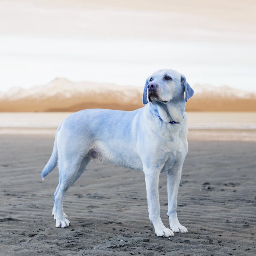

In [24]:
test_image=cv2.resize(dog_image,(256,256))
test_image

array([[[  1,   6,  17],
        [  4,  10,  21],
        [  4,  10,  21],
        ...,
        [  1,   4,   8],
        [  2,   5,   9],
        [  1,   4,   8]],

       [[  3,  11,  24],
        [  3,   9,  20],
        [  4,  10,  21],
        ...,
        [  2,   5,   9],
        [  2,   6,   7],
        [  3,   6,   8]],

       [[  0,   7,  17],
        [  6,  14,  27],
        [  0,   7,  20],
        ...,
        [  2,   5,   9],
        [  0,   4,   5],
        [  4,   6,   6]],

       ...,

       [[ 75, 101, 156],
        [ 74, 101, 151],
        [ 63,  86, 136],
        ...,
        [  5,  10,  13],
        [  5,  10,  13],
        [  4,   8,  10]],

       [[ 95, 117, 162],
        [ 71,  98, 145],
        [ 72,  94, 142],
        ...,
        [ 10,  16,  23],
        [ 11,  16,  23],
        [ 15,  21,  28]],

       [[ 91, 112, 159],
        [ 69,  91, 139],
        [ 64,  85, 133],
        ...,
        [ 11,  19,  26],
        [ 26,  33,  42],
        [ 23,  29,  39]]], dtype=uint8)
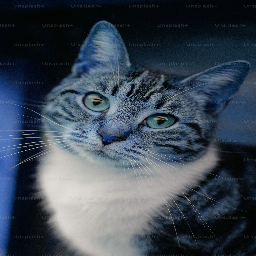

In [25]:
test_image1=cv2.resize(cat_image,(256,256))
test_image1

In [26]:
test_image=test_image.reshape(1,256,256,3)
test_image1=test_image1.reshape(1,256,256,3)

In [28]:
model.predict(test_image)# this is dog in this picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


array([[1.]], dtype=float32)

In [29]:
model.predict(test_image1)# this is cat in this picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.]], dtype=float32)